###1. Conectamos con la nube de Google 

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


###2. Importamos las librerias que utilizaremos

In [3]:
import pandas as pd
import numpy as np
from seaborn import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

###3. Importamos nuestro DataFrame 

In [4]:
df = pd.read_csv('/content/drive/MyDrive/DataAcademy Platzi/Bd/df19.csv')
df

,Clave,Estudio,Costo_dlls,Fecha,Genero,Cantidad
0,MX-0843,PAPANICOLAU,14.5,2019-08-30 00:00:00,Femenino,1.0
1,MX-0843,PAPANICOLAU,14.5,2019-11-21 00:00:00,Femenino,1.0
2,MX-0843,PAPANICOLAU,14.5,2019-12-02 00:00:00,Femenino,1.0
3,MX-0843,PAPANICOLAU,14.5,2019-12-17 00:00:00,Femenino,1.0
4,MX-0843,PAPANICOLAU,14.5,2019-08-14 00:00:00,Femenino,1.0
...,...,...,...,...,...,...
2201,MX-0771,TIEMPO DE TROMBOPLASTINA (TTP),7.5,2019-01-30 00:00:00,Femenino,1.0
2202,MX-0771,TIEMPO DE TROMBOPLASTINA (TTP),7.5,2019-01-30 00:00:00,Femenino,1.0
2203,MX-0771,TIEMPO DE TROMBOPLASTINA (TTP),7.5,2019-01-30 00:00:00,Femenino,1.0
2204,MX-0771,TIEMPO DE TROMBOPLASTINA (TTP),7.5,2019-01-30 00:00:00,Femenino,1.0


In [5]:
df.dtypes

Clave          object
Estudio        object
Costo_dlls    float64
Fecha          object
Genero         object
Cantidad      float64
dtype: object

###4. Analizando las variables del Dataset

- Aplicamos el método ".dtypes" a nuestro Dataset
- Tenemos que cambiar las variables "Fecha" porque se muestra como tipo "objeto" y la variable "Cantidad" porque se muestra como "int64" 


Seleccionamos las variables "Fecha" y "Cantidad" para modificar su tipo

In [6]:
df['Fecha'] = pd.to_datetime(df['Fecha']) #Cambio de variable tipo "object" a "fecha"
df[['Cantidad']] = df[['Cantidad']].astype(int) #Cambio de variable tipo "int64" a "float"
df[['Genero']] = df[['Genero']].astype('category') #Cambio de variable tipo "object" a "Category"

Verificamos nuevamente el tipo de datos de nuestras variables para confirmar  nuestros cambios.

In [7]:
df.dtypes

Clave                 object
Estudio               object
Costo_dlls           float64
Fecha         datetime64[ns]
Genero              category
Cantidad               int64
dtype: object

In [8]:
df

,Clave,Estudio,Costo_dlls,Fecha,Genero,Cantidad
0,MX-0843,PAPANICOLAU,14.5,2019-08-30,Femenino,1
1,MX-0843,PAPANICOLAU,14.5,2019-11-21,Femenino,1
2,MX-0843,PAPANICOLAU,14.5,2019-12-02,Femenino,1
3,MX-0843,PAPANICOLAU,14.5,2019-12-17,Femenino,1
4,MX-0843,PAPANICOLAU,14.5,2019-08-14,Femenino,1
...,...,...,...,...,...,...
2201,MX-0771,TIEMPO DE TROMBOPLASTINA (TTP),7.5,2019-01-30,Femenino,1
2202,MX-0771,TIEMPO DE TROMBOPLASTINA (TTP),7.5,2019-01-30,Femenino,1
2203,MX-0771,TIEMPO DE TROMBOPLASTINA (TTP),7.5,2019-01-30,Femenino,1
2204,MX-0771,TIEMPO DE TROMBOPLASTINA (TTP),7.5,2019-01-30,Femenino,1


In [9]:
df19 = df

In [10]:
#Verificación de totales pro variables numericas
print(df19['Costo_dlls'].sum())
print(df19['Cantidad'].sum())

32403.15
2206


In [11]:
#Creando las solumnas de cada "Genero"

df19_genero = pd.get_dummies(df19, columns = ["Genero"], dtype= int)
#Con el metódo pd.get_dummies vamos a crear 2 columnas 
#Esas columnas llevaran el nombre de la columna original seguido del nombre de su categoria siendo "1"
#Támbien determinamos el tipo de variable con dtype= int

In [12]:
#Creación de genero dataset
df19_top_genero = df19_genero.groupby(['Estudio'])[[  'Genero_Masculino', 'Genero_Femenino']].sum().reset_index().sort_values(by='Genero_Femenino', ascending= False).head(9)


###5. Observaciones en nuestro dataset

- Las variables que encontramos en nuestro dataset:
  - Nombre del estudio
  - Clave
  - El costo en dólares
  - Fecha con día, mes y año
  - Género 






###6. ¿Que información útil podemos descubrir que pueda ayudarle al negocio a tomar decisiones de acuerdo al comportamiento que hubo en el 2019?  

1. ¿Cúales son los 10 estudios más solicitados?
2. ¿Cúales son los 10 estudios que tuvieron mayor volumen de venta?
3. Clasificar los estudios de acuerdo a la cantidad de solicitudes
4. Análizar la relación clasificación Cantidad y representación en ventas
5. Muestra el comportamiento por mes de la cantidad de estudios realizados y las ventas de todo el 2019
6. Muestra el comportamiento que haya tenido el estudio más solicitado durante el año.



# Análisis de Negocio del 2019

En esta parte vamos análizar la parte economica de estudios clinicos de laboratorio




Nuestro dataset tiene 

Hay 2,206 estudios realizados en el 2019 por lo tanto usaremos el metodo "groupby" para agruparlos según la cantidad de cada estudio 

## 1. Obteniendo los 10 estudios más solicitados en el 2019

In [13]:
#Creamos un groupby que va a sumar el número de análisis realizados 
#a cada estudio y lo va ordenar de mayor a menor                    
df19_top = df19.groupby(['Estudio'])[['Cantidad']].sum().reset_index().sort_values(by='Cantidad', ascending= False).head(10)
df19_top

,Estudio,Cantidad
28,CITOMETRIA HEMATICA COMPLETA,413
57,EXAMEN GENERAL DE ORINA,282
119,QUIMICA SANGUINEA COMPLETA (7 ELEMENTOS),246
117,PRUEBA DE EMBARAZO (PIE),110
66,GRUPO SANGUINEO Y RH,88
67,HEMOGLOBINA GLUCOSILADA,72
64,GLUCOSA SERICA,56
128,QUIMICA SANGUINEA PARCIAL,46
148,VIH (CUALITATIVA),38
130,REACCIONES FEBRILES,38


## 1. Gráfica para visualizar los 10 estudios más solicitados



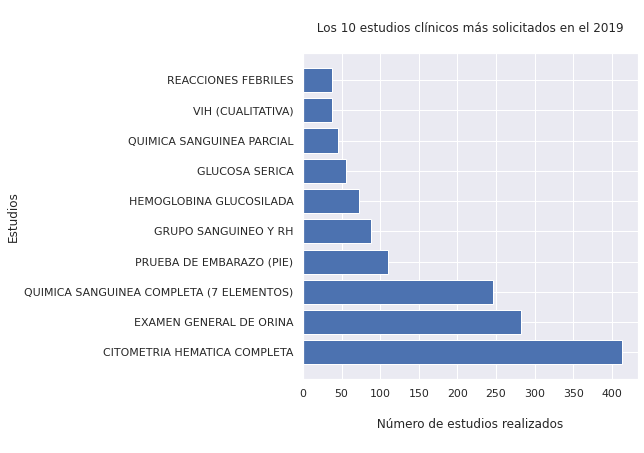

In [14]:
#Usar un estilo de grilla
sns.set()

#Parametros de nuestra gráfica
fig = plt.figure(figsize =(6, 6)) 
plt.barh(df19_top['Estudio'], df19_top['Cantidad'])

#Etiquetas y titúlos de la gráfica
plt.xlabel('\n Número de estudios realizados \n')
plt.ylabel('Estudios')
plt.title('\n Los 10 estudios clínicos más solicitados en el 2019 \n')
plt.savefig("10_estudios_mas_pedidos.jpg", dpi=300, bbox_inches='tight')
plt.show()

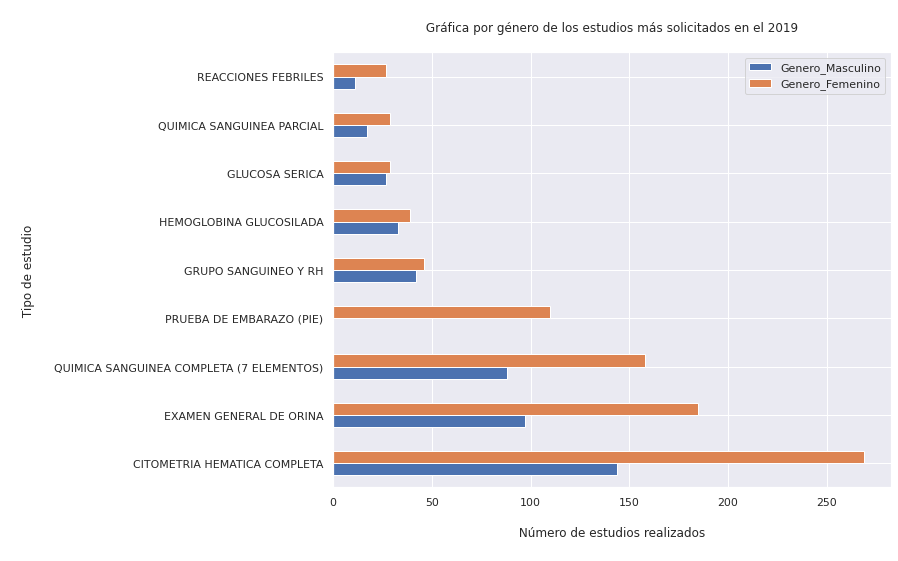

In [15]:
#Realizamos una gráfica por genero de los estudios más solicitados
df19_top_genero.plot(kind="barh", x='Estudio', figsize=(10,8))

#Titúlo y etiquetas de la gráfica
plt.title('\n Gráfica por género de los estudios más solicitados en el 2019 \n')
plt.ylabel('\n Tipo de estudio \n')
plt.xlabel('\n Número de estudios realizados \n')
plt.savefig("estudios_mas_pedidos_genero.jpg", dpi=300, bbox_inches='tight')
plt.xticks(rotation = 0);

In [16]:
#Conslusiones de los 10 estudios más solicitados

print('- En nuestro Dataset se realizaron', df19['Cantidad'].sum(), 'estudios clinicos')
print('- Existen', df19['Clave'].nunique(), ' tipos de estudios diferentes')
print('- Hay 4 estudios que suman la cantidad de', df19_top['Cantidad'].head(4).sum(), 'pruebas realizadas de', df19['Cantidad'].sum() )

resultado = (df19_top['Cantidad'].head(4).sum() / df19 ['Cantidad']. sum()) * 100
formato = "{:.2f}%".format(resultado)
print('- Tan solo esos 4 estudios representan el', formato, 'de todos los estudios realizados en el 2019')
print('- En todo el 2019 la cantidad de mujeres que se realizó algún tipo de prueba fue de', df19_genero['Genero_Femenino'].sum())
print('- Mientras que la cantidad de hombres que se hicieron algún tipo de prueba fue de', df19_genero['Genero_Masculino'].sum())


- En nuestro Dataset se realizaron 2206 estudios clinicos
- Existen 145  tipos de estudios diferentes
- Hay 4 estudios que suman la cantidad de 1051 pruebas realizadas de 2206
- Tan solo esos 4 estudios representan el 47.64% de todos los estudios realizados en el 2019
- En todo el 2019 la cantidad de mujeres que se realizó algún tipo de prueba fue de 1412
- Mientras que la cantidad de hombres que se hicieron algún tipo de prueba fue de 794


## Insights de los 10 estudios más solicitados

- En nuestro Dataset se realizaron 2206 estudios clinicos
- Existen 145  tipos de estudios diferentes en el 2019
- Hay 4 estudios que suman la cantidad de 1,051 pruebas realizadas de 2,206, que son casi el 50% de todos los estudios.
- Tan solo esos 4 estudios representan el 47.64% de todos los estudios realizados en el 2019

###Respecto al genero
- Las mujeres se realizan más estudios clinicos que los hombres
- En todo el 2019 la cantidad de mujeres que se realizó algún tipo de prueba fue de 1,412
- Mientras que la cantidad de hombres que se hicieron algún tipo de prueba fue de 794

## 2. Los 10 estudios clínicos con mayores ventas

In [17]:
#Realizamos copia de nuestro dataframe principal
df19_top_vtas = df19

#Creamos una columna para obtener el total de ventas de cada estudio
df19_top_vtas['Total'] = df19_top_vtas['Costo_dlls'] * df19_top_vtas['Cantidad'] 

#Hacemos un groupby con la columna "Estudio y sumando el "Total" de cada estudio
#Realizamos este paso porque hay filas de estudio repetidas con precios diferentes en la columna de "costos_dlls"
df19_top_vtas = df19_top_vtas.groupby(['Estudio'])[['Total']].sum().reset_index().sort_values(by='Total', ascending= False).head(10) 

#Y obtenemos los 10 estudios con los totales más altos
df19_top_vtas

,Estudio,Total
119,QUIMICA SANGUINEA COMPLETA (7 ELEMENTOS),5137.50
28,CITOMETRIA HEMATICA COMPLETA,3580.60
57,EXAMEN GENERAL DE ORINA,1672.80
102,PERFIL HEPATICO COMPLETO,1131.50
107,PERFIL TIROIDEO 1,952.00
67,HEMOGLOBINA GLUCOSILADA,894.20
45,CULTIVO DE SEMEN CON MIC (ESPERMOCULTIVO),821.10
128,QUIMICA SANGUINEA PARCIAL,714.45
43,CULTIVO DE ORINA (UROCULTIVO) CON MIC,676.20
127,QUIMICA SANGUINEA DE 35 ELEMENTOS,582.75


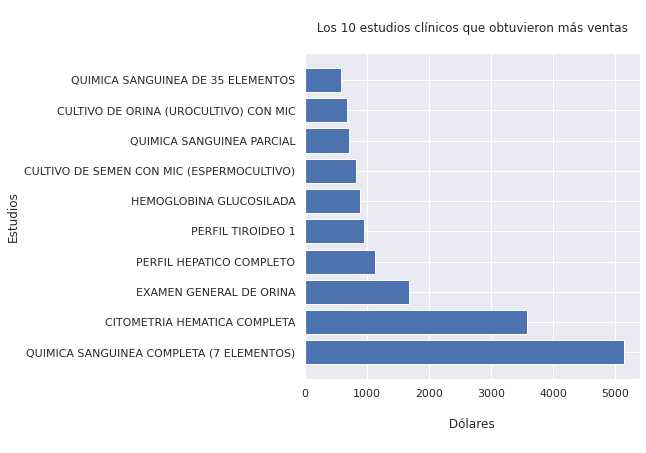

In [18]:
#Parámetros de la gráfica
fig = plt.figure(figsize =(6, 6)) 
plt.barh(df19_top_vtas['Estudio'], df19_top_vtas['Total'])

#Título y etiquetas de la gráfica
plt.xlabel('\n Dólares \n')
plt.ylabel('Estudios')
plt.title('\n Los 10 estudios clínicos que obtuvieron más ventas \n')
plt.savefig("estudios_con_mas_ventas.jpg", dpi=200, bbox_inches='tight')
plt.show()

##Insights de los 10 estudios que reflejan más ventas

- Hay 4 estudios que reflejan más de Mil dólares en ventas durante el año.
- Hay 3 estudios con mayores ventas que támbien son de los 4 estudios con mayor demanda.


## Criterios de clasificación de estudios en relación a la cantidad de solicitudes por año
---



- Reqerimos tomar un criterio para hacer una clasificación de los estudios de acuerdo a su demada por lo tanto nos apoyaremos con una gráfica de caja para estudiar la concentración de los estudios según la cantidad de veces que haya sido solicitado. 
- Para tomar un criterio de clasificación según la frecuencia que solicitan   determinado estudio nos vamos apoyar con los rangos intercuantiles de la gráfica.

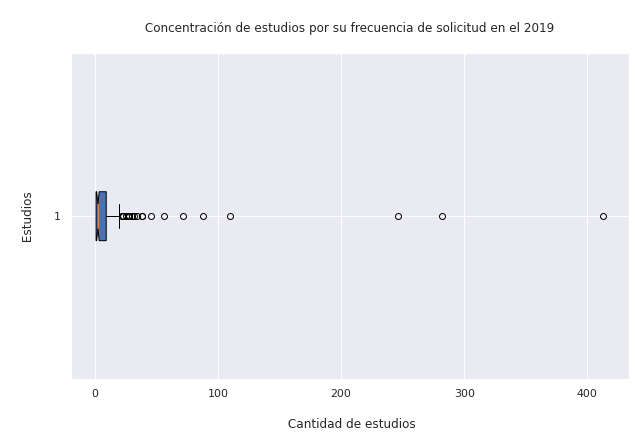

In [19]:
#Creamos nuestro groupby con la variables Estudio y cantidad para nuestra gráfica
criterio = df19.groupby(['Estudio' ])[['Cantidad']].sum()

#Parámetros de la gráfica de tipo "caja" para observar la concentración de las cantidadades de los estudios
fig = plt.figure(figsize =(10, 6)) 
plt.boxplot(criterio['Cantidad'], vert=False, patch_artist=True, notch=True, showfliers=True);

#Título y etiquetas de la gráfica
plt.title('\n Concentración de estudios por su frecuencia de solicitud en el 2019 \n')
plt.xlabel('\n Cantidad de estudios')
plt.ylabel('\n Estudios \n')
plt.savefig("Gráfica_box_frecuencia_de_estudios.jpg", dpi=200, bbox_inches='tight')
plt.show()

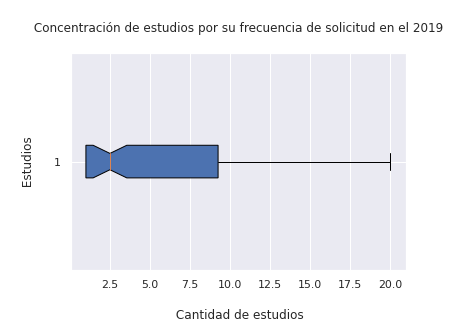

In [20]:
criterio = df19.groupby(['Estudio' ])[['Cantidad']].sum()

#Usando el método "showfliers" de nuestra gráfica de caja podemos obervar a detalle ls intercuantiles sin outliers
plt.boxplot(criterio['Cantidad'], vert=False, patch_artist=True, notch=True, showfliers=False);
plt.title('\n Concentración de estudios por su frecuencia de solicitud en el 2019 \n')
plt.xlabel('\n Cantidad de estudios')
plt.ylabel('\n Estudios \n')
plt.savefig("Gráfica_box_frecuencia_de_estudios_sin_outliers.jpg", dpi=200, bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


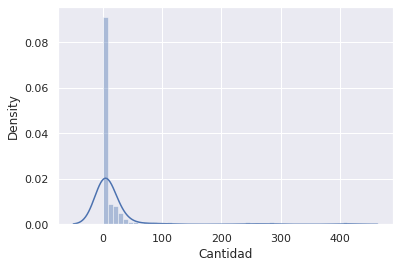

In [21]:
#Hacemos una gráfica para verificar la distribución
sns.distplot(criterio['Cantidad'])
plt.savefig("Gráfica_densidad_de_estudios.jpg", dpi=200, bbox_inches='tight')
plt.show()

In [22]:
#Hacemos un groupby con las variables "Clave" y hacemos una sumatoria de la variable 'Cantidad'
df19_sort = df19.groupby(['Clave' ])[['Cantidad']].sum().reset_index()
df19_sort.describe()

,Cantidad
count,145.000000
mean,15.213793
std,47.427457
min,1.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,413.000000


## Observacioens de la gráfica de caja

- De acuerdo a las gráficas se observa que hay una distribución concentrada de varios estudios pero con muy baja frecuencia de solicitud.
- En la gráfica de caja el rango del primer y tercer rango intercuantil que son el 25% y 75% de concentración de los datos son de 1 a 9 solicitudes 
- Aunque observando los límites que marcan los bigotes de la gráfica, la mayor parte de la distribución se concentra en estudios que tuvieron de 1 a 20 solicitudes.
- De acuerdo a la distribución de la gráfica los estudios que hayan tenido más de 20 solicitudes los considera outliers 
- Claramente se observa que aunque hay muchos estudios considerados outliers solamente los que tienen más de 100 solicitudes son 4 analisis clinicos. 
- En está parte podemos deducir que el laboratorio clinico ofrece una amplia gama de análisis clinicos pero solamente 4 estudios tienen una demanda mayor a 100 solicitudes y la mayor parte de estudios se concentran en tener de 1 a 20 solicitudes en el transcurso del año.





Para hacer esta clasificación nos apoyaremos con los rangos intercuantiles creamos un groupby y sumamos las cantidad de veces que cada estudio fue realizado durante el año y con estos datos usamos el metodo .describe() que nos va  a porporcionar los percentiles.

Podemos darnos cuenta de los siguiente:

- Se realizaron 145 diferentes tipos de estudios
- El 1er rango intercuantil de la gráfica es 1
- El segundo rango intercuantil que a la vez es la mediana es de 3
- El 3er rango intercuantil esta en 9
- La gráfica de caja tambien marca los límites de inicio y final del calculo de su distribución llamados bigotes y en nuestra grafica los marca como 1 y 20 respectivamente.
- Y los valores maximo y minimo son de 1 y 413 respectivamente

Aunque este es el resultado de los percentiles támbien podemos observar que hay varios fuera de los rangos intercuantiles lo que significa que hay estudios que tuvieron una demanda muy alta que rebasaron los parametros de la distribución y fueron tomados como datos atipicos.

##Criterio de Clasificación

Observamos que hay hasta 145 diferentes tipos de estudios pero la mayoria con muy poca frecuencia de ser solicitados por lo que requerimos de una clasificación que nos de una perspectiva de lo que representan economicamente para el negocio.

Para clasificar los analisis clinicos nos vamos apoyar en la distribución mostrada por la gráfica de caja y los outliers.

- Clasificaremos como frecuencia "Baja" a los análisis que hayan tenido de 1 a 20 solicitudes que de acuerdo a la gráfica de caja estan considerados en una distribución proporcionada.
- Para los mayores de 20 pero menores de 100 que fueron considerados como outliers los clasificaremos como frecuencia "Regular" 
- Y para los estudios clinicos que rerpesentan casi el 50% de todos los análisis vamos a clasificarlos como frecuencia "Muy solicitados"


---




In [23]:
#Etiquetamos cada estudio de acuerdo a la cantidad de solicitudes que hayan tenido durante el año y al mismo tiempo
# creamos una columna con esas etiquetas
df19_sort['Frecuencia'] = df19_sort['Cantidad'].apply(lambda x: 'Baja' if (x<=20)  else ('Regular' if(x>=21 and x<=100) else 'Mas solicitados'))
df19_sort

,Clave,Cantidad,Frecuencia
0,MX-01074,1,Baja
1,MX-0108,8,Baja
2,MX-01098,2,Baja
3,MX-0111,1,Baja
4,MX-0114,4,Baja
...,...,...,...
140,MX-0849,5,Baja
141,MX-0891,1,Baja
142,MX-090,2,Baja
143,MX-093,3,Baja


In [24]:
#Verificamos las etiquetas de la clasificación que hicimos en la línea de codigo anterior
df19_sort['Frecuencia'].value_counts()

#La suma de la cantidad que arrojan las etiquetas "145" es igual al número de estudios que hay en el 2019

Baja               123
Regular             18
Mas solicitados      4
Name: Frecuencia, dtype: int64

In [25]:
#Eliminamos la columna 'Cantidad' para no afectar el merge
df19_sort = df19_sort.drop(['Cantidad'], axis=1)

#Hacemos merge de nuestro dataframe de clasificación con nuestro dataframe principal
df19_sort_merge = pd.merge(df19, df19_sort, how='inner')

In [26]:
df19_sort_merge

,Clave,Estudio,Costo_dlls,Fecha,Genero,Cantidad,Total,Frecuencia
0,MX-0843,PAPANICOLAU,14.50,2019-08-30,Femenino,1,14.50,Baja
1,MX-0843,PAPANICOLAU,14.50,2019-11-21,Femenino,1,14.50,Baja
2,MX-0843,PAPANICOLAU,14.50,2019-12-02,Femenino,1,14.50,Baja
3,MX-0843,PAPANICOLAU,14.50,2019-12-17,Femenino,1,14.50,Baja
4,MX-0843,PAPANICOLAU,14.50,2019-08-14,Femenino,1,14.50,Baja
...,...,...,...,...,...,...,...,...
2201,MX-0816,UREA EN ORINA DE 24 HORAS,7.80,2019-01-20,Femenino,1,7.80,Baja
2202,MX-0813,TSH NEONATAL,15.75,2019-09-01,Femenino,1,15.75,Baja
2203,MX-0813,TSH NEONATAL,15.75,2019-09-01,Femenino,1,15.75,Baja
2204,MX-0819,UREA SERICA,5.00,2019-01-24,Femenino,1,5.00,Baja


In [27]:
#La sumatoria de las 3 etiquetas coincide con la cantidad de estdudios realizados
df19_sort_merge['Frecuencia'].value_counts()

Mas solicitados    1051
Regular             665
Baja                490
Name: Frecuencia, dtype: int64

In [28]:
df19_sort_merge['Costo_dlls'].sum()

32403.150000000005

In [29]:
#Realizamos un groupby con nuestras columnas de "Frecuencia", "Costo_dlls" y "Cantidad" 
df_freq_cant = df19_sort_merge.groupby(['Frecuencia'])[['Costo_dlls', 'Cantidad']].sum().reset_index()
df_freq_cant

,Frecuencia,Costo_dlls,Cantidad
0,Baja,11981.45,490
1,Mas solicitados,10882.05,1051
2,Regular,9539.65,665


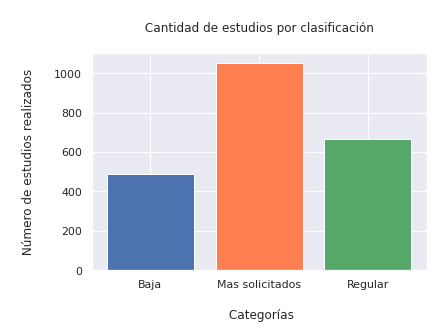

In [30]:
#Parámetros de la gráfica de barras para cada etiqueta por el número de estudios realizados
plt.bar( df_freq_cant['Frecuencia'], df_freq_cant['Cantidad'], color= ['b', 'coral', 'g'])

#Título y etiquetas de la gráfica
plt.title('\n Cantidad de estudios por clasificación \n')
plt.xlabel('\n Categorías')
plt.ylabel('\n Número de estudios realizados \n')
plt.savefig("Gráfica_barras_por_clasificación_y_cantidad.jpg", dpi=200, bbox_inches='tight')
plt.show()

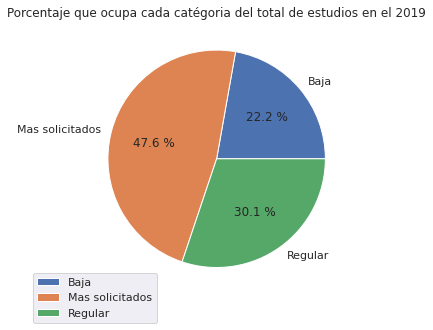

In [31]:
#Parámetros de la gráfica de tipo "pie" para mostrar los porcentajes por cada etiqueta
fig = plt.figure(figsize =(5,5)) 
plt.pie(df_freq_cant['Cantidad'], labels= df_freq_cant['Frecuencia'],  autopct="%0.1f %%" )
plt.legend(bbox_to_anchor =(0.3,0.1))

#Título de la gráfica
plt.title('Porcentaje que ocupa cada catégoria del total de estudios en el 2019')
plt.savefig("Gráfica_pie_porcentaje_clasificación.jpg", dpi=200, bbox_inches='tight')
plt.show()

###Observaciones de las graficas Frecuencias - Cantidad

- Con la clasificación que hicimos podemos obtener los siguientes datos:
  - "Baja"	- 490 - 22.2%
  - "Regular"	- 665 - 30.1%
  - "Mas solicitados"	-	1051 - 47.6%

- Como ya se había observado anteriormente y con 1051 estudios realizados que representa el 47.6% los tienen 4 análisis clinicos que clasificamos como "Más solicitados"
- Los estudios que se encontraron dentro de nuestra gráfica de distribución tipo caja que son los analisis que tuvieron de 1 a 20 solicitudes fueron los de frecuencia "Baja" y tuvieron el 22.2% con un total de 490 estudios realizados.
- Y los estudios clinicos que fueron solicitados más de 20 veces pero menos de 100 fueron los estudios con etiqueta de frecuencia regular con 665 estudios realizados siendo el 30.1% del total.
- Lo que podemos deducir con estas graficas y datos es que hay 4 estudios que representan casi el 50% de los estudios realizados 
- Otro insight que encontramos es que hay una amplia oferta de estudios pero con una frecuencia baja de ser solicitados, incluso hay estudios que solo fueron solicitados una vez al año.
- Haciendo una observación general podemos decir que hay pocos estudios con mucha frecuencia de ser solicitados y que hay muchos tipos de estudios pero con una frecuencia muy baja de ser solicitados.
- Este insight encontrado no reflejara algo bueno o malo para el negocio, todo depende del valor economico que represente y esto lo observaremos en nuestra siguiente gráfica.


## 4. Acumulación y porcentaje de ventas según su clasificación de demanda.

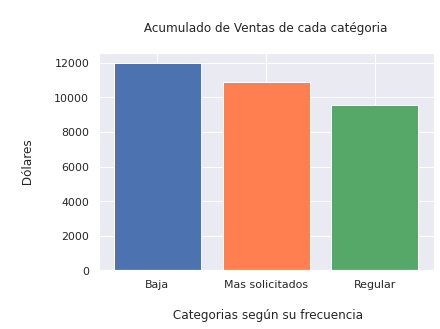

In [32]:
#Parámetros de la gráfica de tipo barras para cada etiqueta según sus ventas
plt.bar( df_freq_cant['Frecuencia'], df_freq_cant['Costo_dlls'], color= ['b', 'coral', 'g' ])

#Parámetros de la gráfica
plt.title('\n Acumulado de Ventas de cada catégoria \n')
plt.xlabel('\n Categorias según su frecuencia')
plt.ylabel('\n Dólares \n')
plt.savefig("Acumulado_ventas_x_categorias.jpg", dpi=200, bbox_inches='tight')
plt.show()

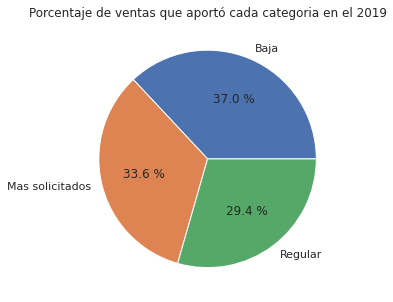

In [33]:
#Parámetros de la gráfica tipo "Pie" para mostrar el porcentaje quye representa en ventas cada etiqueta
fig = plt.figure(figsize =(5,5)) 
plt.pie(df_freq_cant['Costo_dlls'], labels= df_freq_cant['Frecuencia'],  autopct="%0.1f %%" )

#Título de la gráfica
plt.title('Porcentaje de ventas que aportó cada categoria en el 2019')
plt.savefig("Porcentaje_ventas_x_categorias.jpg", dpi=200, bbox_inches='tight')
plt.show()

##Observaciones de las graficas Frecuencias - Ventas

- Al observar nuestras gráficas podemos ver que la frecuencia que tiene más aportación en ventas es la frecuencia "baja" seguida de la frecuencia de "muy solicitados" y con menos aportación esta la frecuencia "Regular"
- En porcentajes hay una pequeña pero mayor aportación en ventas con 37% de la frecuencia "Baja", seguido de 33.6%  para "Más solicitados" y con 29.4% con la frecuencia regular.
- Aunque los análisis clinicos clasificados como "Mas solicitados" son los que tienen casi el 50% de estudios realizados realmente son los estudios de frecuencia baja los que aportan más en ventas .
- Por lo tanto podemos decir que aunque hay estudios que son muy solicitados y representan casi el 50% del trabajo que se hace en el laboratoirio clinico los estudios que tienen poca frecuencia de ser solicitados representan más valor economico aunque algunos solo se realicen una vez al año.
- Y por los porcentajes en ventas que representan cada frecuencia tienen la misma importancia.

##Analisis de Frecuencia "Baja"

In [34]:
Frec_baja = df19_sort_merge[df19_sort_merge['Frecuencia'] == "Baja"]

In [35]:
Frec_baja_group = Frec_baja.groupby(['Estudio'])[['Cantidad', 'Costo_dlls']].sum().reset_index().sort_values(by='Costo_dlls', ascending= False)

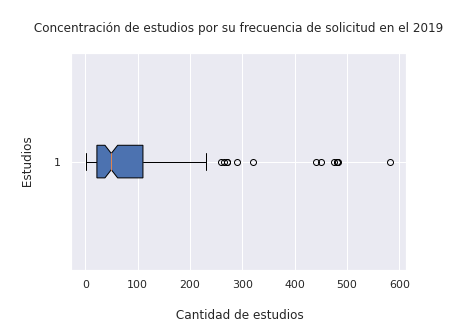

In [36]:
#Frec_baja_group(['Estudio' ])[['Costo_dlls']].sum()

#Usando el método "showfliers" de nuestra gráfica de caja podemos obervar a detalle ls intercuantiles sin outliers
plt.boxplot(Frec_baja_group['Costo_dlls'], vert=False, patch_artist=True, notch=True, showfliers=True);
plt.title('\n Concentración de estudios por su frecuencia de solicitud en el 2019 \n')
plt.xlabel('\n Cantidad de estudios')
plt.ylabel('\n Estudios \n')
plt.savefig("Gráfica_box_frecuencia_de_estudios_sin_outliers.jpg", dpi=200, bbox_inches='tight')
plt.show()

##Dataset principal con frecuencias 

In [37]:
#Dummieando la columna de "Frecuencia"
df19_sort_merge_freq = pd.get_dummies(df19_sort_merge, columns = ["Frecuencia"], dtype = int)#Con el metódo pd.get_dummies vamos a crear 2 columnas 
#Esas columnas llevaran el nombre de la columna original seguido del nombre de su categoria siendo "1"

df19_sort_merge_freq

,Clave,Estudio,Costo_dlls,Fecha,Genero,Cantidad,Total,Frecuencia_Baja,Frecuencia_Mas solicitados,Frecuencia_Regular
0,MX-0843,PAPANICOLAU,14.50,2019-08-30,Femenino,1,14.50,1,0,0
1,MX-0843,PAPANICOLAU,14.50,2019-11-21,Femenino,1,14.50,1,0,0
2,MX-0843,PAPANICOLAU,14.50,2019-12-02,Femenino,1,14.50,1,0,0
3,MX-0843,PAPANICOLAU,14.50,2019-12-17,Femenino,1,14.50,1,0,0
4,MX-0843,PAPANICOLAU,14.50,2019-08-14,Femenino,1,14.50,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2201,MX-0816,UREA EN ORINA DE 24 HORAS,7.80,2019-01-20,Femenino,1,7.80,1,0,0
2202,MX-0813,TSH NEONATAL,15.75,2019-09-01,Femenino,1,15.75,1,0,0
2203,MX-0813,TSH NEONATAL,15.75,2019-09-01,Femenino,1,15.75,1,0,0
2204,MX-0819,UREA SERICA,5.00,2019-01-24,Femenino,1,5.00,1,0,0


In [38]:
#Creamos un groupby por los meses del año sumando las variabels de "Cantidad", 'Costo_dlls', y Frecuencias de género
df19_sort_merge_freq_meses = df19_sort_merge_freq.groupby(['Fecha', 'Estudio',])[['Cantidad', 'Costo_dlls',  'Frecuencia_Baja',	'Frecuencia_Mas solicitados',	'Frecuencia_Regular']].sum().reset_index()

#Asignamos indice principal a Fecha
df19_sort_merge_freq_meses = df19_sort_merge_freq_meses.set_index('Fecha')

#Separamos nuestro dataframe por meses y sumamos los valores de cada variable
df19_sort_merge_freq_meses = df19_sort_merge_freq_meses.resample('m').sum()

#Reseteamos el indice y mostramos nuestro dataset
df19_sort_merge_freq_meses = df19_sort_merge_freq_meses.reset_index()
df19_sort_merge_freq_meses

,Fecha,Cantidad,Costo_dlls,Frecuencia_Baja,Frecuencia_Mas solicitados,Frecuencia_Regular
0,2019-01-31,125,2203.75,42,44,39
1,2019-02-28,151,2233.30,53,63,35
2,2019-03-31,107,1788.05,35,45,27
3,2019-04-30,140,2160.25,36,68,36
4,2019-05-31,168,2514.45,31,80,57
5,2019-06-30,156,2139.70,27,76,53
6,2019-07-31,185,2456.50,36,91,58
7,2019-08-31,269,3403.85,45,127,97
8,2019-09-30,339,5400.90,69,191,79
9,2019-10-31,164,2428.95,33,79,52


In [39]:
#Creando y agregando el index de los meses para nuestras gráficas y dataframe
df19_sort_merge_freq_meses.index = (['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun','Jul', 'Agos', 'Sept', 'Oct', 'Nov', 'Dic'])

In [40]:
#Hacemos .Describe() a nuestro dataset creado de la información de todo el año
df19_sort_merge_freq_meses.describe()

,Cantidad,Costo_dlls,Frecuencia_Baja,Frecuencia_Mas solicitados,Frecuencia_Regular
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,183.833333,2700.262500,40.833333,87.583333,55.416667
std,64.864661,971.070446,11.264048,40.200539,20.056549
min,107.000000,1788.050000,27.000000,44.000000,27.000000
25%,148.250000,2192.875000,34.500000,66.750000,38.250000
50%,166.000000,2388.675000,38.000000,78.500000,55.000000
75%,193.250000,2717.100000,43.500000,95.500000,64.500000
max,339.000000,5400.900000,69.000000,191.000000,97.000000


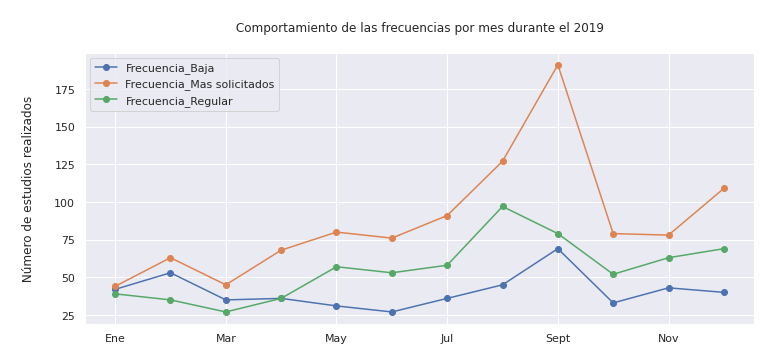

In [41]:
sns.set()

#Parámetros de la gráfica de tipo "Línea" para visualizar el comportamiento
df19_sort_merge_freq_meses[['Frecuencia_Baja',	'Frecuencia_Mas solicitados',	'Frecuencia_Regular']].plot(kind ='line',  marker = 'o',figsize=(12,5));

#Títulos de la gráfica
plt.title('\n Comportamiento de las frecuencias por mes durante el 2019 \n')
plt.ylabel('\n Número de estudios realizados \n');
plt.savefig("Comportamiento_mensual_de_categorias.jpg", dpi=200, bbox_inches='tight')
plt.show()

##Comportamiento de los 3 tipos de frecuencias durante el año

- Los 3 tipos de frecuencias muestran en la mayor parte de los meses la misma tendencia
- En Enero empiezan las tres frecuencias con menos de 50 estudios cada una
- El mes más bajo para las 3 frecuencias es Marzo mientras que el mes con mayor cantidad de estudios es Septiembre.
- En septiembre la frecuencia de "Mas solicitados" muestra su comportamiento más alto del año junto con la frecuencia "Baja" aunque en diferentes proporciones.
- Los estudios clasificados como "Regular" en septiembre tienen un comportamiento a la inversa bajando su tendencia pero aún asi más altos que la frecuencia baja.
- La frecuencia "Baja" oscila en el rangod e los 25 a 50 la mayor parte del año excepto en Septiembre
- La frecuencia "Regular" los primeros 4 meses tiene una tendencia a la baja pero a partir de mayo muestra una tendencia a mantenerse entre los 50 y 75 estudios por mes, alcanzando su punto más alto en Agosto.
-  La frecuencia "Mas solicitados" mantiene un comportamiento similar a las otras 2 tendencias.



---



## 5. Comportamiento general "mensual" de todo el 2019

In [42]:
#Definimos nuestro dataset para obtener lso datos de forma mensual
df19_time = df19

In [43]:
df19_time = df19_time.set_index('Fecha') # Con este metodo podemos llamar como indice principal la columna "Fecha"

In [44]:
df19_time

,Clave,Estudio,Costo_dlls,Genero,Cantidad,Total
Fecha,,,,,,
2019-08-30,MX-0843,PAPANICOLAU,14.5,Femenino,1,14.5
2019-11-21,MX-0843,PAPANICOLAU,14.5,Femenino,1,14.5
2019-12-02,MX-0843,PAPANICOLAU,14.5,Femenino,1,14.5
2019-12-17,MX-0843,PAPANICOLAU,14.5,Femenino,1,14.5
2019-08-14,MX-0843,PAPANICOLAU,14.5,Femenino,1,14.5
...,...,...,...,...,...,...
2019-01-30,MX-0771,TIEMPO DE TROMBOPLASTINA (TTP),7.5,Femenino,1,7.5
2019-01-30,MX-0771,TIEMPO DE TROMBOPLASTINA (TTP),7.5,Femenino,1,7.5
2019-01-30,MX-0771,TIEMPO DE TROMBOPLASTINA (TTP),7.5,Femenino,1,7.5


##5.1 Tabla y gráficas del comportamiento mensual de las ventas del 2019

In [45]:
#Con este resample sumamos todos los datos correspondientes de cada mes del año de la variable de Costos_dlls
#De esta forma obtenemos cuanto se genero en ventas cada mes
df19_vta = df19_time['Costo_dlls'].resample('m').sum().reset_index()
df19_vta

,Fecha,Costo_dlls
0,2019-01-31,2203.75
1,2019-02-28,2233.30
2,2019-03-31,1788.05
3,2019-04-30,2160.25
4,2019-05-31,2514.45
5,2019-06-30,2139.70
6,2019-07-31,2456.50
7,2019-08-31,3403.85
8,2019-09-30,5400.90
9,2019-10-31,2428.95


In [46]:
#Aplicamos el metódo .describe() a nuestro datset para ver los datos estadísticos
df19_vta.describe()

,Costo_dlls
count,12.000000
mean,2700.262500
std,971.070446
min,1788.050000
25%,2192.875000
50%,2388.675000
75%,2717.100000
max,5400.900000


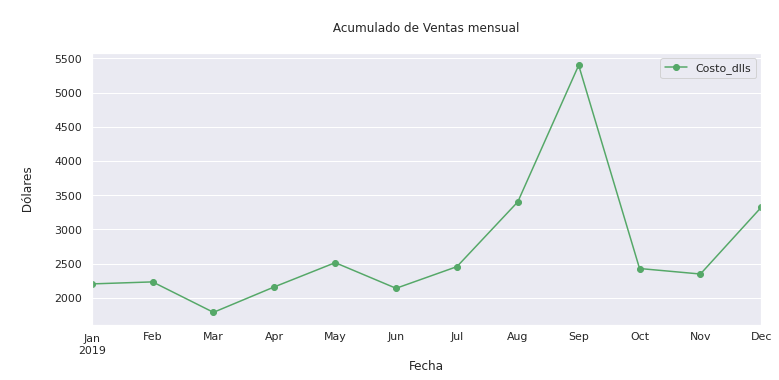

In [47]:
#Parámetros para generar una gráfica de lineas que nos indique el comportamiento de las ventas por mes durante el año
df19_vta.plot(kind="line", x='Fecha', y='Costo_dlls', marker = 'o', color = 'g',figsize=(12,5));

#Titúlo y etiquetas de la gráfica
plt.title('\n Acumulado de Ventas mensual \n')
plt.ylabel('\n Dólares \n')
plt.xlim()
plt.savefig("Comportamiento_mensual_de_ventas.jpg", dpi=200, bbox_inches='tight')
plt.show()

##Comportamiento por mes de acuerdo a las ventas

- La mayor parte de las ventas por mes ocilan entre los 2 mil y 2,500 dólares
- El mes con menos ventas en Marzo
- Las mayores ventas se dan en los meses de Agosto, Septiembre y Diciembre 
- Septiembre es el mes más alto en ventas

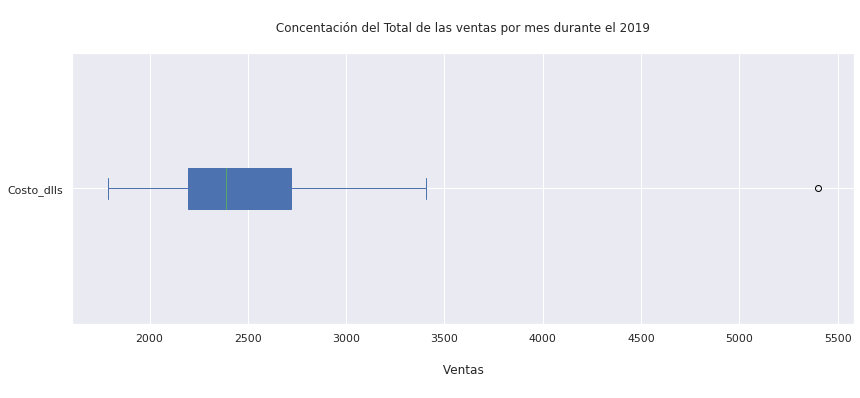

In [48]:
#Parámetros para generar una gráfica de caja que nos indique en que rangos de intercuantiles se estuvieron 
#Comportando las ventas de cada mes del año 2019 
df19_vta.plot(kind="box", x='Fecha', y='Costo_dlls',  vert=False, patch_artist=True, showfliers= True,  figsize=(14,5));

#Titúlo y etiquetas de la gráfica
plt.title('\n Concentación del Total de las ventas por mes durante el 2019 \n')
plt.xlabel('\n Ventas \n')
plt.savefig("Rango_mensual_ventas.jpg", dpi=200, bbox_inches='tight')
plt.show()

- En la gráfica Boxplot podemos visuallizar que las ventas de todo el año de acuerdo al 1er y 3er intercuantil se concentran entre los 1,800 y  3,400 dólares.
- La mediana queda cerca de los 2,400 dlls.
- Hubo un dato atípico en septiembre con un registro cerca de casi 5,500 dlls.



## 5.2 Comportamiento de la cantidad de estudios realizados por mes de todo el 2019

In [49]:
#Creamos nuestro dataset con el acumulado mensual de estudios realizados durante el año
df19_estudios = df19_time['Cantidad'].resample('m').sum().reset_index()
df19_estudios.index = (['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun','Jul', 'Agos', 'Sept', 'Oct', 'Nov', 'Dic'])
df19_estudios

,Fecha,Cantidad
Ene,2019-01-31,125
Feb,2019-02-28,151
Mar,2019-03-31,107
Abr,2019-04-30,140
May,2019-05-31,168
Jun,2019-06-30,156
Jul,2019-07-31,185
Agos,2019-08-31,269
Sept,2019-09-30,339
Oct,2019-10-31,164


In [50]:
df19_estudios['Cantidad'].describe()

count     12.000000
mean     183.833333
std       64.864661
min      107.000000
25%      148.250000
50%      166.000000
75%      193.250000
max      339.000000
Name: Cantidad, dtype: float64

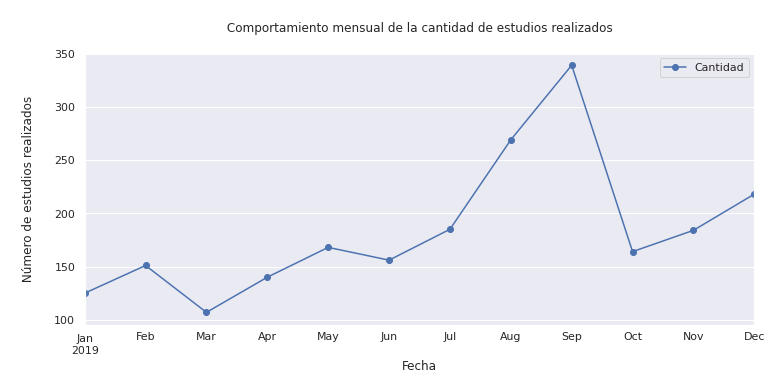

In [51]:
#Parámetros para generar una gráfica de lineas que nos indique el comportamiento de las ventas por mes durante el año
df19_estudios.plot(kind="line", x='Fecha', y='Cantidad', marker = 'o',figsize=(12,5));

#Titúlo y etiquetas de la gráfica
plt.title('\n Comportamiento mensual de la cantidad de estudios realizados \n')
plt.ylabel('\n Número de estudios realizados \n')
plt.xlim()
plt.savefig("Comportamiento_mensual_por_cantidad.jpg", dpi=200, bbox_inches='tight')
plt.show()

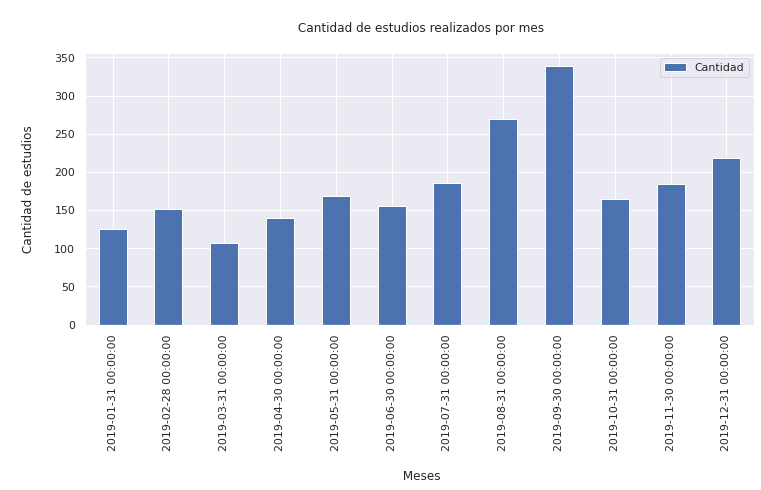

In [52]:
#Párametros para crear la gráfica de barras que indican la cantidad de estudios de cada mes
sns.set()
df19_estudios.plot(kind="bar", x='Fecha', y='Cantidad',figsize=(12,5));

#Titúlo y etiquetas de la gráfica
plt.title('\n Cantidad de estudios realizados por mes\n')
plt.xlabel('\n Meses')
plt.ylabel('\n Cantidad de estudios \n')
plt.savefig("Cantidad_mensual_de_estudios.jpg", dpi=200, bbox_inches='tight')
plt.show()

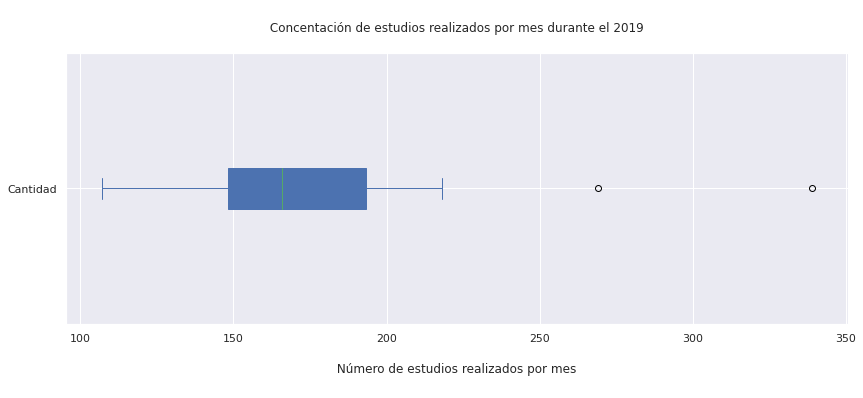

In [53]:
#Parámetros para crear una gráfica de caja que nos indique los rangos intercuantiles en lo que se concentran 
#la cantidad de estudios realizados durante el año
df19_estudios.plot(kind="box", x='Fecha', y='Cantidad', vert=False, patch_artist=True, showfliers= True,  figsize=(14,5));

#Titúlo y etiquetas de la gráfica
plt.title('\n Concentación de estudios realizados por mes durante el 2019 \n')
plt.xlabel('\n Número de estudios realizados por mes \n')
plt.savefig("Distribución_anual_de_cantidad_de_estudios.jpg", dpi=200, bbox_inches='tight')
plt.show()

##Volumen de cantidad de estudios por mes

- La mayor parte de los meses oscilan de 150 a 200 estudios por mes
- Los meses con más volumen de estudios  realizados son Agosto, Septiembre y Diciembre.
- El mes con menos volumen de estudios realizados es en Marzo con poco más de 100 estudios






---
##6. Comportamiento del estudio clínico más solicitado


In [54]:
#Revisamos que estudio es el más solicitado de acuerdo a la cantidad de estudiso realizados por análisis clinico
df19['Estudio'].value_counts().head(5)

CITOMETRIA HEMATICA COMPLETA                413
EXAMEN GENERAL DE ORINA                     282
QUIMICA SANGUINEA COMPLETA (7 ELEMENTOS)    246
PRUEBA DE EMBARAZO (PIE)                    110
GRUPO SANGUINEO Y RH                         88
Name: Estudio, dtype: int64

In [55]:
#Extraemos los datos del estudio de Citometria Hematica completa de nuestro dataset 
df_estudio = df19[df19['Clave'] == "MX-0222"]

### Analizando la demanda del estudio MX-0222 por género en el 2019

In [56]:
df_estudio['Cantidad'].value_counts()

1    413
Name: Cantidad, dtype: int64

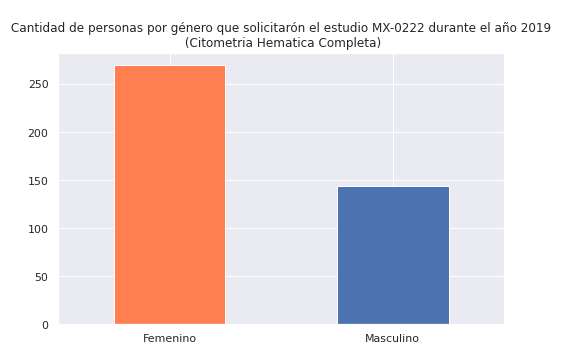

In [57]:
#Creamos una gráfica de las variable categorica de "Genero" para saber comos e comportoe sta variable
df_estudio['Genero'].value_counts().plot(kind='bar', color= ('coral','b'), figsize=(8,5))

#Titúlo y etiquetas de la gráfica
plt.title('\n Cantidad de personas por género que solicitarón el estudio MX-0222 durante el año 2019 \n (Citometria Hematica Completa)',)
plt.xticks(rotation=0)
plt.savefig("Comparación_por_genero_estudio_más_solicitado.jpg", dpi=200, bbox_inches='tight')
plt.show()

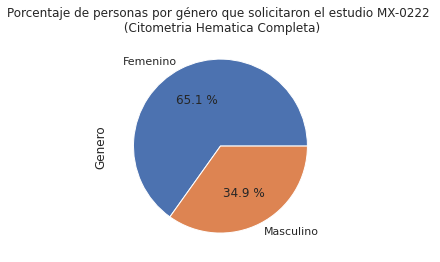

In [58]:
#Generamos una gráfica de tipo "Pie" para comparar el porcentaje de cada género
df_estudio['Genero'].value_counts().plot(kind='pie',   autopct="%0.1f %%", title='Porcentaje de personas por género que solicitaron el estudio MX-0222 \n (Citometria Hematica Completa)')
plt.xticks(rotation=0)
plt.savefig("Porcentaje_por_genero_estudio_más_solicitado.jpg", dpi=200, bbox_inches='tight')
plt.show()

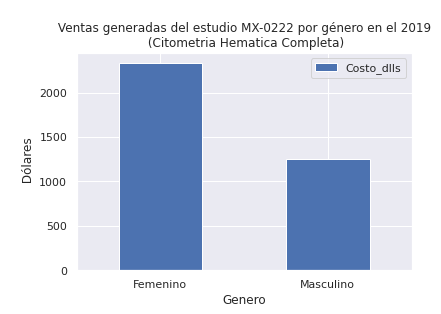

In [59]:
#Creamos nuestra gráfica de comparación por genero del estudio "MX-0222" para tener encuenta el 
#ingreso obtenido de cada genero.
df_estudio.groupby(['Genero'])[['Costo_dlls']].sum().reset_index().plot(kind='bar', x='Genero')

#Titúlo y etiquetas de la gráfica
plt.xticks(rotation=0)
plt.title('\n Ventas generadas del estudio MX-0222 por género en el 2019 \n (Citometria Hematica Completa)',)
plt.ylabel('\n Dólares')
plt.savefig("Comparación_genero_con_más_ventas.jpg", dpi=200, bbox_inches='tight')
plt.show()

In [60]:
#Extraemos los datos correspondientes al estduio que vamos a graficar su comportamiento
df_mensual = df19_genero[df19_genero['Clave'] == "MX-0222"]

In [61]:
#Modificamos nuestro dataframe para que el indice principal sea "Fecha" 
df_mensual = df_mensual.set_index('Fecha')

In [62]:
df_mensual = df_mensual.resample('m').sum()#Ahora que nuestro dataframe marca como indice principal "Fecha"
#vamos a crear un reshape que sumara todos los valores de nuestro dataframe pero por "mes"

In [63]:
#Generamos nuestro dataset con los valores acumulados por mes 
df_mensual = df_mensual.reset_index()
df_mensual

,Fecha,Costo_dlls,Cantidad,Genero_Femenino,Genero_Masculino
0,2019-01-31,122.50,14,11,3
1,2019-02-28,192.50,22,12,10
2,2019-03-31,104.15,12,9,3
3,2019-04-30,173.30,20,14,6
4,2019-05-31,239.90,28,18,10
5,2019-06-30,218.75,25,21,4
6,2019-07-31,260.80,30,23,7
7,2019-08-31,472.50,54,29,25
8,2019-09-30,777.90,89,53,36
9,2019-10-31,287.05,33,19,14


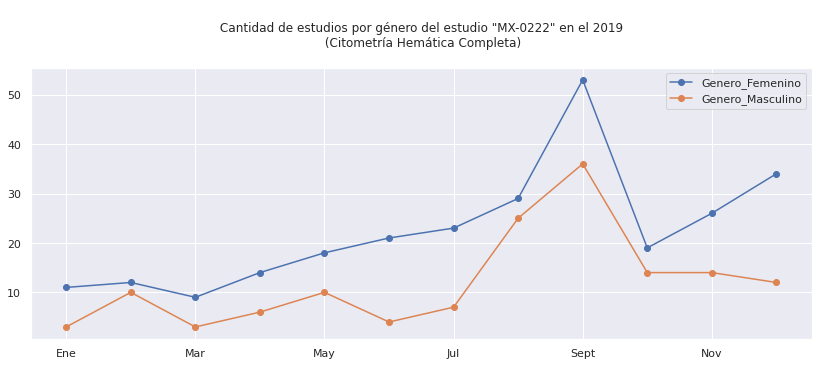

In [64]:
#Creamos nuestra gráfica de líneas para análizar el comportamiento de cada género durante el año respecto
#al estudio más solicitado que fue el de "Citometría Hemática Completa" 
df_mensual.index = (['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun','Jul', 'Agos', 'Sept', 'Oct', 'Nov', 'Dic'])
df_mensual[['Genero_Femenino',  'Genero_Masculino']].plot(kind="line", marker = 'o', figsize=(14,5));

#Titúlo de la gráfica
plt.title('\n Cantidad de estudios por género del estudio "MX-0222" en el 2019 \n (Citometría Hemática Completa)\n',)
plt.savefig("Comportamiento_mensual_genero_estudio_más_solicitado.jpg", dpi=200, bbox_inches='tight')
plt.show()

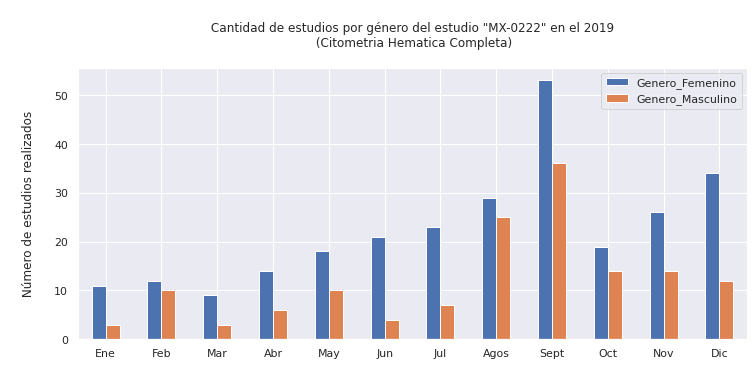

In [65]:
#Mismo análisis del comportamiento de los géneros con el estudio más solicitado con gráfica de barras
df_mensual[['Genero_Femenino',  'Genero_Masculino']].plot(kind="bar", figsize=(12,5))

#Titúlo y etiquetas de la gráfica
plt.title('\n Cantidad de estudios por género del estudio "MX-0222" en el 2019 \n (Citometria Hematica Completa)\n',);
plt.ylabel('\n Número de estudios realizados \n')
plt.xticks(rotation = 0)
plt.savefig("Comparación_genero_mensual_estudio_más_solicitado.jpg", dpi=200, bbox_inches='tight')
plt.show()

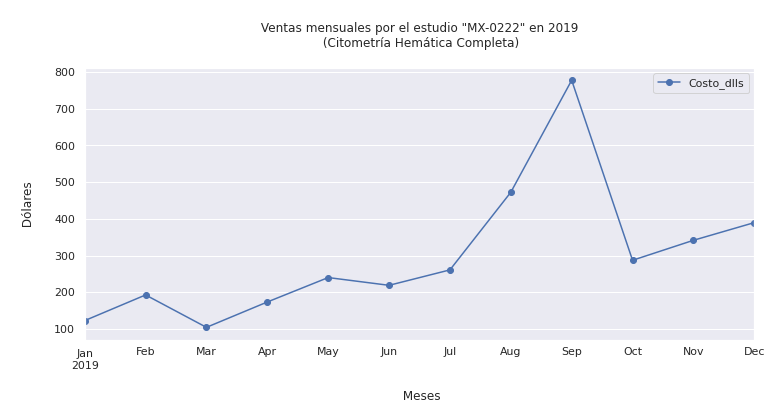

In [66]:
#Gráfica de líneas del aporte en ventas del estudio más solicitado
df_mensual.plot(kind="line", x='Fecha', y='Costo_dlls', marker = 'o',figsize=(12,5));

#Titúlo y etiquetas de la gráfica
plt.title('\n Ventas mensuales por el estudio "MX-0222" en 2019 \n (Citometría Hemática Completa)\n')
plt.xlabel('\n Meses')
plt.ylabel('\n Dólares \n')
plt.xlim()
plt.savefig("Comportamiento_ventas_mensual_estudio_más_solicitado.jpg", dpi=200, bbox_inches='tight')
plt.show()

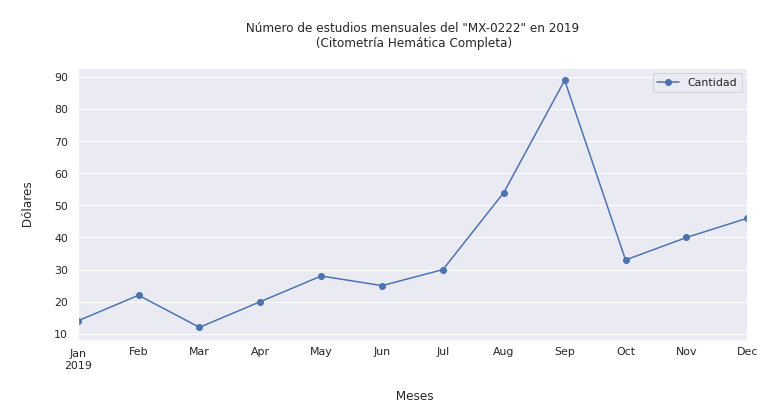

In [67]:
#Gráfica de líneas para observar el comportamiento de la cantidad de estudios realizados mensualmente al 
#estudio más solicitado
df_mensual.plot(kind="line", x='Fecha', y='Cantidad', marker = 'o',figsize=(12,5));

#Titúlo y etiquetas de la gráfica
plt.title('\n Número de estudios mensuales del "MX-0222" en 2019 \n (Citometría Hemática Completa)\n')
plt.xlabel('\n Meses')
plt.ylabel('\n Dólares \n')
plt.xlim()
plt.savefig("Cantidad_mensual_de_estudio_más_solicitado.jpg", dpi=200, bbox_inches='tight')
plt.show()

In [68]:
print(df19['Costo_dlls'].sum()) #Sacamos el total de lo generado en ventas por todos los estudios en el 2019
print(df_mensual['Costo_dlls'].sum()) #Total obtenido del estudio más solicitado 
print((df_mensual['Costo_dlls'].sum() *100)/(df19['Costo_dlls'].sum())) #Porcentaje correspondiente de aportación
#en ventas del estudio más solicitado
print(df19['Cantidad'].sum()) #Cantidad total de estudios realizados en el 2019

32403.15
3580.6
11.050160246766131
2206


#Observaciones del estudio más solicitado en el 2019 

- El estudio mas solicitado fue de "Citometria Hematica Completa"  y es un estudio que se centra en observar y examinar la sangre, pero más en específico las células que están presentes en ella, es decir, glóbulos rojos, que son los que transportan oxígeno a todo el cuerpo, támbien  los glóbulos blancos que nos ayudan a combatir infecciones y las plaquetas, que tienen como función principal detener hemorragias creando coágulos.

- Este estudio es el más solcitado siendo que en el 2019 se realizaron 413 estudios.
- De esos 413 estudios el 65% fueron realizados a mujeres y el 35% a hombres.
- El máximo de estudios realizados en un mes fue en Septiembre con un total de 89 análisis.
- La cantidad de estudios realizados en la mayor parte de los meses oscilan de los 20 a 40 análisis realizados.
- De esos 89 análisis realizados en Septiembre 53 estudios corresponden a mujeres y 36 a Hombres.
- El mes que tuvo menos análisis realizados fue en Marzo con solo 12 estudios de los cuales 9 correspondieron a mujeres y 3 a hombres.
- Solamente este estudio representa el 18.72% de los 2206  análisis realizados.
- En ventas este estudio representó el 11.05% de las ventas realizadas por los estudios

##Analsisi por genero

In [69]:
df19_genero

,Clave,Estudio,Costo_dlls,Fecha,Cantidad,Genero_Femenino,Genero_Masculino
0,MX-0843,PAPANICOLAU,14.5,2019-08-30,1,1,0
1,MX-0843,PAPANICOLAU,14.5,2019-11-21,1,1,0
2,MX-0843,PAPANICOLAU,14.5,2019-12-02,1,1,0
3,MX-0843,PAPANICOLAU,14.5,2019-12-17,1,1,0
4,MX-0843,PAPANICOLAU,14.5,2019-08-14,1,1,0
...,...,...,...,...,...,...,...
2201,MX-0771,TIEMPO DE TROMBOPLASTINA (TTP),7.5,2019-01-30,1,1,0
2202,MX-0771,TIEMPO DE TROMBOPLASTINA (TTP),7.5,2019-01-30,1,1,0
2203,MX-0771,TIEMPO DE TROMBOPLASTINA (TTP),7.5,2019-01-30,1,1,0
2204,MX-0771,TIEMPO DE TROMBOPLASTINA (TTP),7.5,2019-01-30,1,1,0


In [70]:
#Creamos un groupby por los meses del año sumando las variabels de "Cantidad", 'Costo_dlls', y Frecuencias de género
df19_genero_meses = df19_genero.groupby(['Fecha', 'Estudio',])[['Genero_Femenino', 'Genero_Masculino']].sum().reset_index()

#Asignamos indice principal a Fecha
df19_genero_meses = df19_genero_meses.set_index('Fecha')

#Separamos nuestro dataframe por meses y sumamos los valores de cada variable
df19_genero_meses = df19_genero_meses.resample('m').sum()

#Reseteamos el indice y mostramos nuestro dataset
df19_genero_meses = df19_genero_meses.reset_index()
df19_genero_meses

,Fecha,Genero_Femenino,Genero_Masculino
0,2019-01-31,97,28
1,2019-02-28,94,57
2,2019-03-31,78,29
3,2019-04-30,88,52
4,2019-05-31,96,72
5,2019-06-30,115,41
6,2019-07-31,127,58
7,2019-08-31,156,113
8,2019-09-30,222,117
9,2019-10-31,91,73


In [71]:
df19_genero_meses.describe()

,Genero_Femenino,Genero_Masculino
count,12.000000,12.000000
mean,117.666667,66.166667
std,40.899730,28.673185
min,78.000000,28.000000
25%,93.250000,49.250000
50%,98.000000,63.500000
75%,132.500000,76.000000
max,222.000000,117.000000


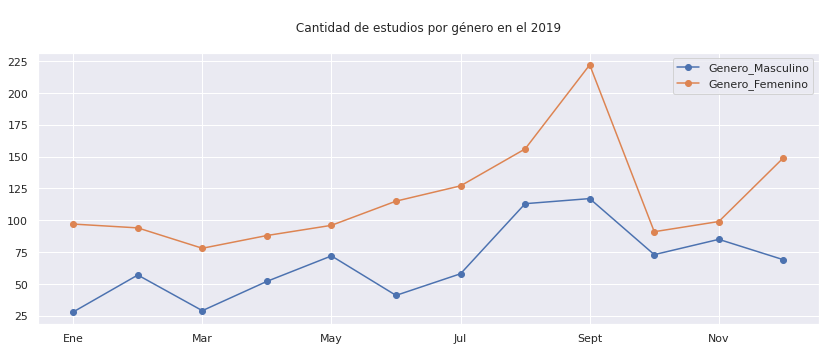

In [77]:
#Creamos nuestra gráfica de líneas para análizar el comportamiento de cada género durante el año respecto
#al estudio más solicitado que fue el de "Citometría Hemática Completa" 
df19_genero_meses.index = (['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun','Jul', 'Agos', 'Sept', 'Oct', 'Nov', 'Dic'])
df19_genero_meses[[  'Genero_Masculino', 'Genero_Femenino',]].plot(kind="line", marker = 'o', figsize=(14,5));

#Titúlo de la gráfica
plt.title('\n Cantidad de estudios por género en el 2019 \n ',)
plt.savefig("Comportamiento_mensual_genero_lineal.jpg", dpi=200, bbox_inches='tight')
plt.show()

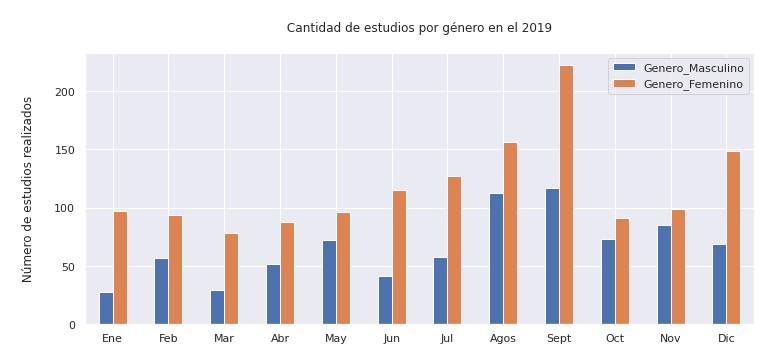

In [73]:
df19_genero_meses[['Genero_Masculino','Genero_Femenino']].plot(kind="bar", figsize=(12,5))

plt.title('\n Cantidad de estudios por género en el 2019 \n',);
plt.ylabel('\n Número de estudios realizados \n')
plt.xticks(rotation = 0)
plt.savefig("Comparación_genero_mensual_.jpg", dpi=200, bbox_inches='tight')
plt.show()

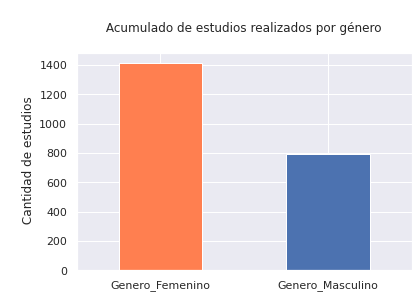

In [74]:
df19_genero[['Genero_Femenino', 'Genero_Masculino']].sum().plot(kind='bar', x='Genero', color= ('coral','b'))


#Titúlo y etiquetas de la gráfica
plt.xticks(rotation=0)
plt.title('\n Acumulado de estudios realizados por género \n ')
plt.ylabel('\n Cantidad de estudios')
plt.savefig("Comparación_genero.jpg", dpi=200, bbox_inches='tight')
plt.show()

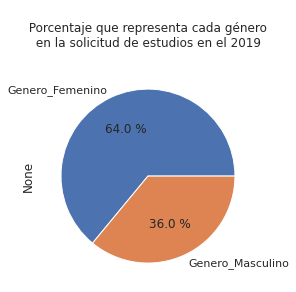

In [75]:
df19_genero[['Genero_Femenino', 'Genero_Masculino']].sum().plot(kind='pie', x='Genero',  autopct="%0.1f %%")

#Título de la gráfica
plt.title('\n Porcentaje que representa cada género \n en la solicitud de estudios en el 2019 \n')
plt.savefig("Comparacion_genero_porcentajes.jpg", dpi=200, bbox_inches='tight')
plt.show()

In [76]:
df19_genero_meses.describe()

,Genero_Femenino,Genero_Masculino
count,12.000000,12.000000
mean,117.666667,66.166667
std,40.899730,28.673185
min,78.000000,28.000000
25%,93.250000,49.250000
50%,98.000000,63.500000
75%,132.500000,76.000000
max,222.000000,117.000000
